1 Import Libraries and Load Dataset

In [ ]:
# Remove warning messages
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\used_car_listings.csv")
# Display the first 5 rows
print(df.head())
# Display basic info
print(df.info())
# Display basic statistics   
print(df.describe(include='all'))
print(df.head())
print(df.info())
df


   listing_id                vin     make     model  year   trim  body_type  \
0           1  9M6LF68V634LY2252    Tesla   Model 3  2019    NaN      Coupe   
1           2  1S0ZCY536BSCY2864   Nissan     Rogue  2024     LT      Sedan   
2           3  YFB625BN0RTMZ5590  Hyundai       i20  2018    XLE  Crossover   
3           4  CPMZ4RFN5WYL37096      Kia  Sportage  2023     EX  Hatchback   
4           5  4PJZG3MV6D9365673      Kia    Seltos  2020  Trend     Pickup   

  fuel_type transmission  mileage    price condition              location  \
0  Electric       Manual    46134  19919.0      good   New Lindsey, GA, US   
1    Hybrid    Automatic    16109  19480.0      good      Pughtown, CO, US   
2    Petrol    Automatic   173239   4556.0      good      Satna, HR, India   
3    Diesel          CVT    36810  11536.0      fair     山武市, Osaka, Japan   
4    Diesel    Automatic    87749  14098.0      good  長生郡長生村, Osaka, Japan   

           seller_type                                  

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2064,06B83BVF8F2W81547,Skoda,Kushaq,2023,Sport,Pickup,Petrol,Automatic,24566,34696.0,like new,"Shahjahanpur, KA, India",Certified Pre-Owned,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,2065,4P7083L79MBVK5696,Mahindra,Scorpio,2016,XSE,SUV,Diesel,Automatic,122459,2642.0,excellent,"Marques, PR, Brazil",Dealer,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,2066,5RERFW1M7B00A4061,Audi,A6,2018,EX,Hatchback,Diesel,DCT,120452,7093.0,good,"Dhanbad, KL, India",Private Party,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,2067,DJB6DBAS5UNNX0757,Skoda,Kushaq,2021,LX,MPV,Petrol,Manual,57043,11296.0,excellent,"Caitlinstad, NL, Canada",Certified Pre-Owned,"Backup Camera, Panoramic Roof, Parking Sensors..."


2 Data Cleaning

In [26]:
# Check for missing values
print("\nMissing values per column:\n", df.isna().sum())
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)
# Check data types
print("\nData types:\n", df.dtypes)
# Convert any date columns to datetime if present
# (If you have a 'year' or 'date' column, we will check later)
# Display shape after cleaning
print("\nDataset shape after removing duplicates:", df.shape)



Missing values per column:
 listing_id        0
vin               0
make              0
model             0
year              0
trim            244
body_type         0
fuel_type         0
transmission      0
mileage           0
price             0
condition        46
location          0
seller_type       0
features        151
dtype: int64

Number of duplicate rows: 0

Data types:
 listing_id        int64
vin              object
make             object
model            object
year              int64
trim             object
body_type        object
fuel_type        object
transmission     object
mileage           int64
price           float64
condition        object
location         object
seller_type      object
features         object
dtype: object

Dataset shape after removing duplicates: (2068, 15)


3 Handle Missing Values

In [27]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Fill numeric missing values with median
for col in numeric_cols:
    if df[col].isna().sum()>0:
        df[col].fillna(df[col].median(),inplace=True)
# Fill categorical missing values with mode
for col in categorical_cols:
    if df[col].isna().sum()>0:
        df[col].fillna(df[col].mode()[0],inplace=True)
# Verify no missing values remain
print("\nMissing values after imputation:\n",df.isna().sum())



Missing values after imputation:
 listing_id      0
vin             0
make            0
model           0
year            0
trim            0
body_type       0
fuel_type       0
transmission    0
mileage         0
price           0
condition       0
location        0
seller_type     0
features        0
dtype: int64


4 price distribution

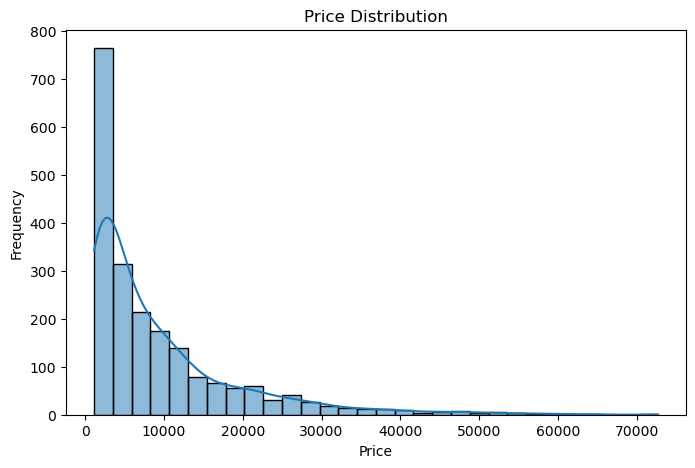

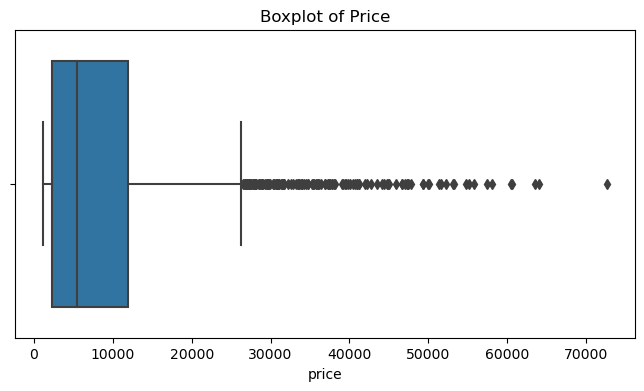

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# Boxplot for Price (to detect outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()


6 Mileage Distribution

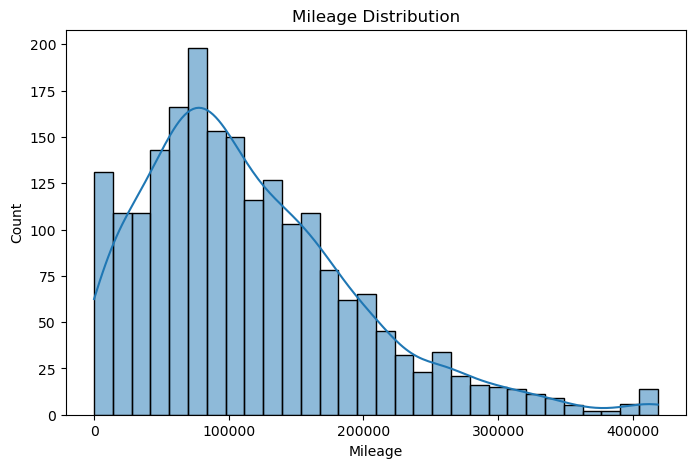

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['mileage'], bins=30, kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.show()


7 Car Brand Frequency

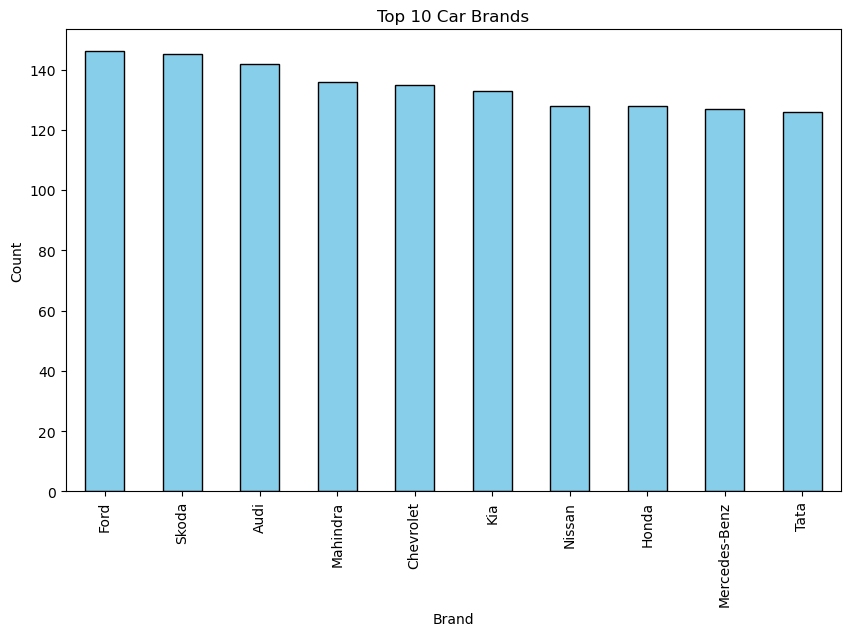

In [30]:
plt.figure(figsize=(10,6))
df['make'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


8 Outlier Detection (IQR Method)

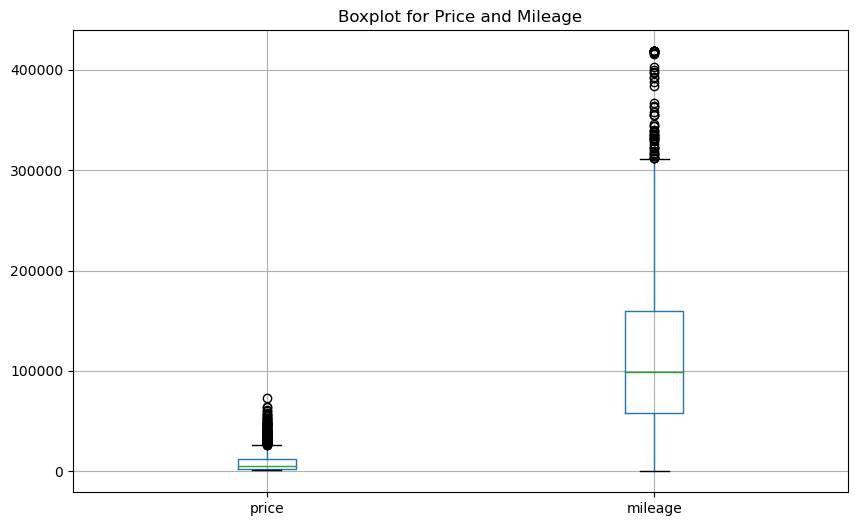

In [31]:
plt.figure(figsize=(10,6))
df[['price', 'mileage']].boxplot()
plt.title('Boxplot for Price and Mileage')
plt.show()


9 Feature Engineering

In [32]:
import datetime
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']
df['price_per_km'] = df['price'] / (df['mileage'] + 1)  # +1 to avoid division by zero
# Encode brand and any other categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(df.head(1))
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes
df.head(1)


   listing_id                vin   make    model  year     trim body_type  \
0           1  9M6LF68V634LY2252  Tesla  Model 3  2019  Touring     Coupe   

  fuel_type transmission  mileage    price condition             location  \
0  Electric       Manual    46134  19919.0      good  New Lindsey, GA, US   

  seller_type                                           features  car_age  \
0      Dealer  Alloy Wheels, Android Auto, Apple CarPlay, Fog...        6   

   price_per_km  
0      0.431755  


,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features,car_age,price_per_km
0,1,587,13,36,2019,15,1,2,4,46134,19919.0,2,967,1,636,6,0.431755


10 Visualization & Insights

In [33]:
import datetime
if 'car_age' not in df.columns and 'year' in df.columns:
    current_year = datetime.datetime.now().year
    df['car_age'] = current_year - df['year']
if 'price_per_km' not in df.columns and 'mileage' in df.columns:
    df['price_per_km'] = df['price'] / (df['mileage'] + 1)
print(df[['year', 'car_age']].head())
print(df[['mileage', 'price_per_km']].head())

   year  car_age
0  2019        6
1  2024        1
2  2018        7
3  2023        2
4  2020        5
   mileage  price_per_km
0    46134      0.431755
1    16109      1.209187
2   173239      0.026299
3    36810      0.313385
4    87749      0.160661


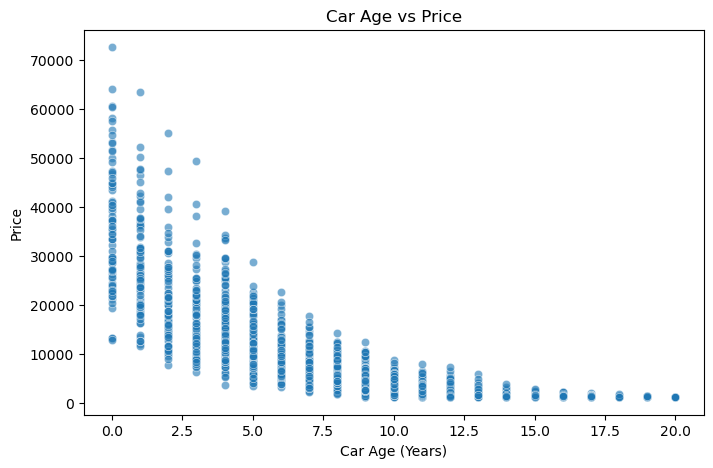

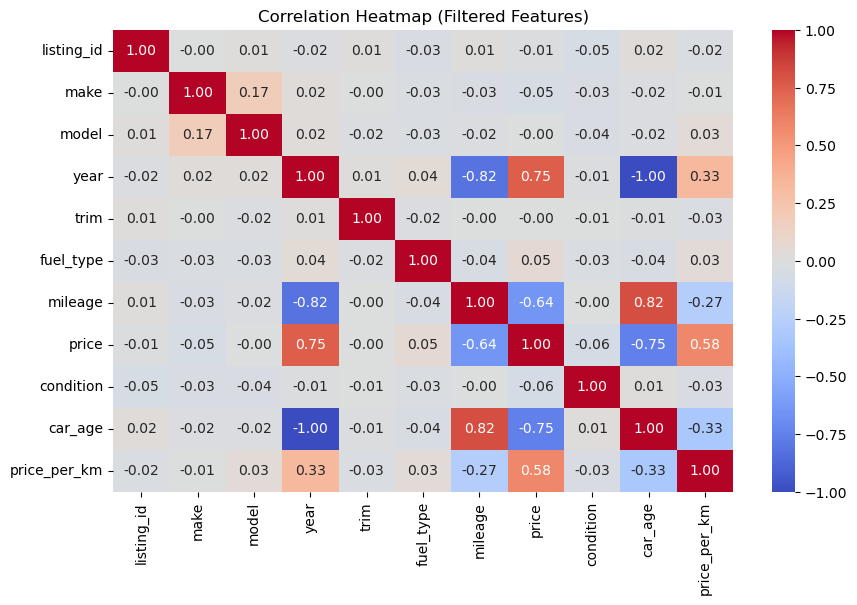

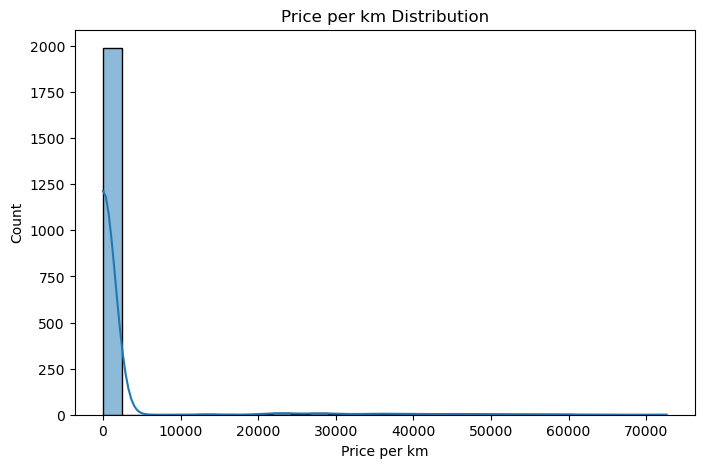

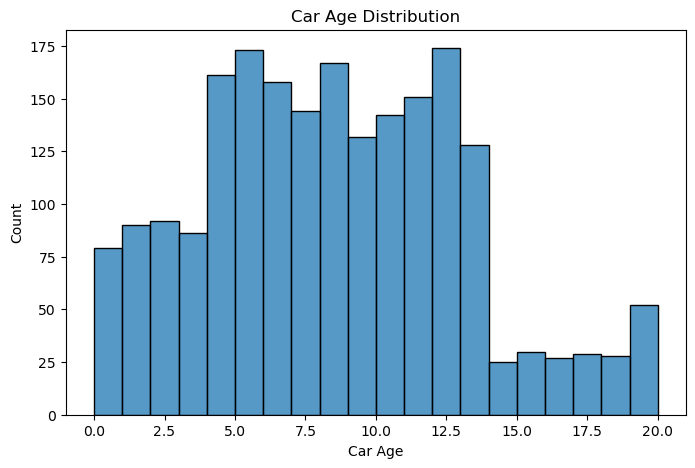

In [34]:
# Car Age vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='car_age', y='price', data=df, alpha=0.6)
plt.title('Car Age vs Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()
# Cleaner Correlation Heatmap (drop irrelevant columns)
drop_cols = ['vin', 'location', 'features', 'body_type', 'seller_type', 'transmission']
df_corr = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Filtered Features)')
plt.show()
# Price per km Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_km'], bins=30, kde=True)
plt.title('Price per km Distribution')
plt.xlabel('Price per km')
plt.show()
# Car Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['car_age'], bins=20, kde=False)
plt.title('Car Age Distribution')
plt.xlabel('Car Age')
plt.show()


11 Observations

Price Distribution

1  Prices are highly skewed; most cars are in the low to mid-price range, with few luxury cars as outliers.

2  Car Age

* Older cars (10+ years) are significantly cheaper; strong negative correlation with price.

3 Mileage

* Higher mileage reduces price, but the relationship is non-linear.

4 Top Brands

* Popular brands have stable price ranges; luxury brands show wider variation.

5 Price per km

* Useful metric to compare cars with similar age but different usage.